<a href="https://www.kaggle.com/code/melissakormesser/uk-inflation-assessment-on-year-and-quarter?scriptVersionId=156918271" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uk-inflation-data-1989-2022/Inflation by Month.csv
/kaggle/input/uk-inflation-data-1989-2022/Inflation by Year.csv
/kaggle/input/uk-inflation-data-1989-2022/Inflation by Quarter.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [3]:
df = pd. read_csv('/kaggle/input/uk-inflation-data-1989-2022/Inflation by Year.csv')

In [4]:
df.head()

,Year,Inflation
0,1989,5.7
1,1990,8.0
2,1991,7.5
3,1992,4.6
4,1993,2.6


In [5]:
df.shape

(34, 2)

In [6]:
df.info

<bound method DataFrame.info of     Year  Inflation
0   1989        5.7
1   1990        8.0
2   1991        7.5
3   1992        4.6
4   1993        2.6
5   1994        2.2
6   1995        2.7
7   1996        2.9
8   1997        2.2
9   1998        1.8
10  1999        1.7
11  2000        1.2
12  2001        1.6
13  2002        1.5
14  2003        1.4
15  2004        1.4
16  2005        2.1
17  2006        2.5
18  2007        2.4
19  2008        3.5
20  2009        2.0
21  2010        2.5
22  2011        3.8
23  2012        2.6
24  2013        2.3
25  2014        1.5
26  2015        0.4
27  2016        1.0
28  2017        2.6
29  2018        2.3
30  2019        1.7
31  2020        1.0
32  2021        2.5
33  2022        7.9>

In [7]:
df.describe

<bound method NDFrame.describe of     Year  Inflation
0   1989        5.7
1   1990        8.0
2   1991        7.5
3   1992        4.6
4   1993        2.6
5   1994        2.2
6   1995        2.7
7   1996        2.9
8   1997        2.2
9   1998        1.8
10  1999        1.7
11  2000        1.2
12  2001        1.6
13  2002        1.5
14  2003        1.4
15  2004        1.4
16  2005        2.1
17  2006        2.5
18  2007        2.4
19  2008        3.5
20  2009        2.0
21  2010        2.5
22  2011        3.8
23  2012        2.6
24  2013        2.3
25  2014        1.5
26  2015        0.4
27  2016        1.0
28  2017        2.6
29  2018        2.3
30  2019        1.7
31  2020        1.0
32  2021        2.5
33  2022        7.9>

In [8]:
df.columns

Index(['Year', 'Inflation'], dtype='object')

In [9]:
df.isna().sum()

Year         0
Inflation    0
dtype: int64

In [10]:
dfa = df.drop(columns='Year')

array([[<Axes: title={'center': 'Inflation'}>]], dtype=object)

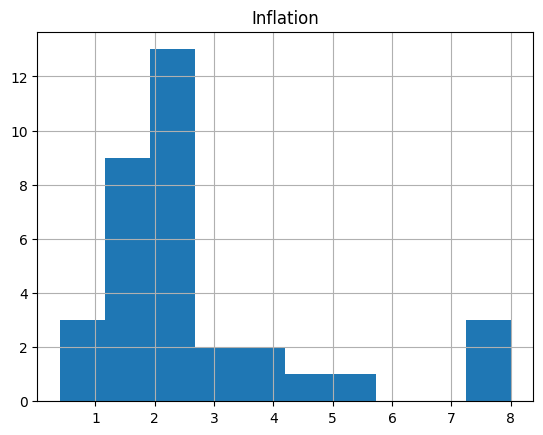

In [11]:
dfa.hist()

#These codes were to import the libraries and access the data, view the data shape, rows, columns,type of data, ect, and see if there are any zeroes that need to be removed. Luckily everything was pretty clean and I can move on to the first question.

# Question 1 Using the dataset ’Inflation by Year.xls’ divide the dataset into the first number of years as the first half and the second half and perform a t-test. What are you testing for here and what conclusion can you produce as a result?

In [12]:
df1 = dfa.iloc[:18,:]
df2 = dfa.iloc[16:,:]

In [13]:
print("Shape of new dataframes - {} , {}".format(df1.shape, df2.shape))

Shape of new dataframes - (18, 1) , (18, 1)


#First things first, i split the rows/ years of inflation in half (roughly) using iloc and then print in order to check to verify it was done correctly.

In [14]:
import scipy.stats as sta

In [15]:
t_stat, p_val = sta.ttest_ind(df1['Inflation'], df2['Inflation']) 

In [16]:
print("t-statistic = " + str(t_stat))  
print("p-value = " + str(p_val))

t-statistic = 0.811029611590975
p-value = 0.4229899038827236


#The t Test can measure a few things, in this case we are measuring if there is a diffrence in the means of the two groups to check for correlation. When conducting the t test we get a value of 81% for the t test and .42 for the p value. The t-statistic measures the strength of the evidence to reject the hypothesis; with a 81% t statistic we have pretty good evidence. The P value measures the percentage that the t test has occured from chance. With the P value greater than .05 we can state that there is not a significant difference in the means of each group.

# Question 2 Using the dataset ’Inflation by Quarter.xls’ divide the dataset into the first half of data points in order and the second half and test if their mean inflation values have a statistically significant difference.

In [17]:
df_new = pd. read_csv('/kaggle/input/uk-inflation-data-1989-2022/Inflation by Quarter.csv')

In [18]:
df_new.head()

,Year,Quarter,Inflation
0,1989,Q1,5.8
1,1989,Q2,5.8
2,1989,Q3,5.6
3,1989,Q4,5.7
4,1990,Q1,6.1


In [19]:
df_new.shape

(138, 3)

In [20]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       138 non-null    int64  
 1   Quarter    138 non-null    object 
 2   Inflation  138 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.4+ KB


In [21]:
df_new.describe()

,Year,Inflation
count,138.000000,138.000000
mean,2005.753623,2.824638
std,9.997672,2.047352
min,1989.000000,0.300000
25%,1997.000000,1.600000
50%,2006.000000,2.300000
75%,2014.000000,2.900000
max,2023.000000,9.400000


In [22]:
df_new.isna().sum()

Year         0
Quarter      0
Inflation    0
dtype: int64

 #Once again after importing the data set, i use the various descriptive functions to analyze the data a little closer. Luckily no zeroes again in our data, however, the Quarter  and year columns are an object so i will drop the quarter column.

In [23]:
dfz = df_new.drop(['Quarter',], axis=1)

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Inflation'}>]], dtype=object)

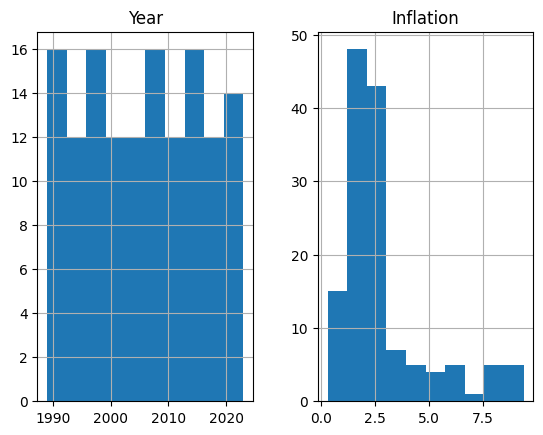

In [24]:
dfz.hist()

In [25]:
dfb = dfz.iloc[:69,:]
dfc = dfz.iloc[69:,:]

In [26]:
print("Shape of new dataframes - {} , {}".format(dfb.shape, dfc.shape))

Shape of new dataframes - (69, 2) , (69, 2)


#Here i split the new dataset into two and confirmed by printing the new shape.

In [27]:
dfb.describe()

,Year,Inflation
count,69.000000,69.000000
mean,1997.130435,2.985507
std,5.017361,2.138394
min,1989.000000,1.000000
25%,1993.000000,1.600000
50%,1997.000000,2.100000
75%,2001.000000,3.000000
max,2006.000000,9.200000


In [28]:
dfc.describe()

,Year,Inflation
count,69.000000,69.000000
mean,2014.376812,2.663768
std,5.029622,1.954405
min,2006.000000,0.300000
25%,2010.000000,1.600000
50%,2014.000000,2.400000
75%,2019.000000,2.800000
max,2023.000000,9.400000


*I pulled the dataset stats to visually compare the differences in mean,  min and max.*

In [29]:
t_stat, p_val = sta.ttest_ind(dfb['Inflation'], dfc['Inflation']) 

In [30]:
print("t-statistic = " + str(t_stat))  
print("p-value = " + str(p_val))


t-statistic = 0.922538892387219
p-value = 0.35788130606874147


#With the new data set we have an even better t statistic when running the t test so we can confirm that there is very strong evidence in the test. With the O value at .35 it is greater than the rejet value of .05 so we can confirm that there is not a significant variance in the means of the two groups.

# Question 3 Does the data in these 2 files follow a Normal distribution?

In [31]:
from scipy.stats import shapiro

In [32]:
stats, p = shapiro(dfa)

print('Statistics=%.3f, p=%.3f' % (stats, p))

Statistics=0.771, p=0.000


In [33]:
dfa.skew()

Inflation    1.801597
dtype: float64

array([[<Axes: title={'center': 'Inflation'}>]], dtype=object)

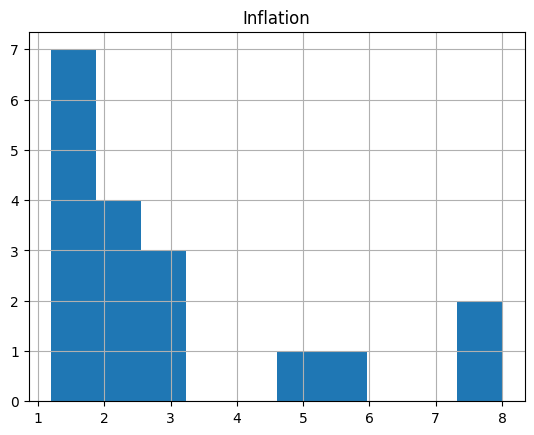

In [34]:
df1.hist()

I used three tests to determine normality; Visual through histogram, skew, and the shapiro test for both datsets. In the df1 data we see that all three tests confirm that the data is not normally distributed with 71% statistics so we are 71% sure of the result of non normal. For df2 we can also confirm that the data is not normally distributed with 75% sure of our results.

array([[<Axes: title={'center': 'Inflation'}>]], dtype=object)

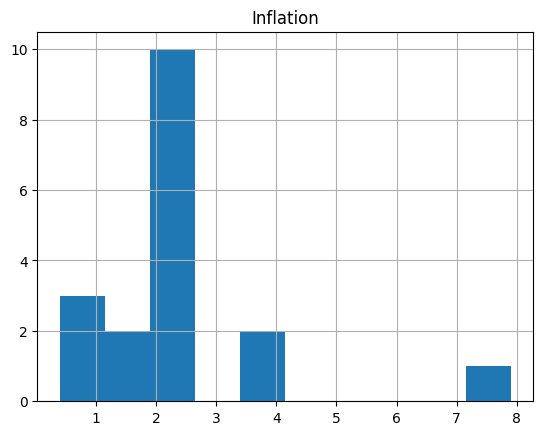

In [35]:
df2.hist()

In [36]:
df2.skew()

Inflation    2.405829
dtype: float64

In [37]:
stats, p = shapiro(df2)

print('Statistics=%.3f, p=%.3f' % (stats, p))

Statistics=0.753, p=0.000


 #I used three tests to determine normality; Visual through histogram, skew, and the shapiro test for both datsets. For df2 we can also confirm that the data is not normally distributed with 75% sure of our results.

# Question 4 Is the data in these 2 files suitable for simple linear regression? Produce models for each dataset using a suitable spacing and discuss the results.

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
X = df.iloc[:, 0].values.reshape(-1, 1)  
Y = df.iloc[:, 1].values.reshape(-1, 1)  
linear_regressor = LinearRegression()  
linear_regressor.fit(X, Y)  
Y_pred = linear_regressor.predict(X)  

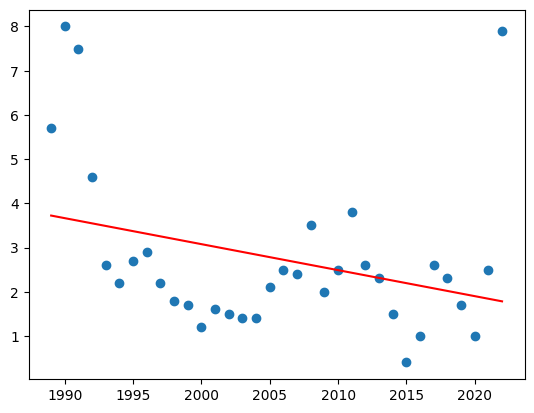

In [40]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [41]:
X = dfz.iloc[:, 0].values.reshape(-1, 1)  
Y = dfz.iloc[:, 1].values.reshape(-1, 1)  
linear_regressor = LinearRegression()  
linear_regressor.fit(X, Y)  
Y_pred = linear_regressor.predict(X) 

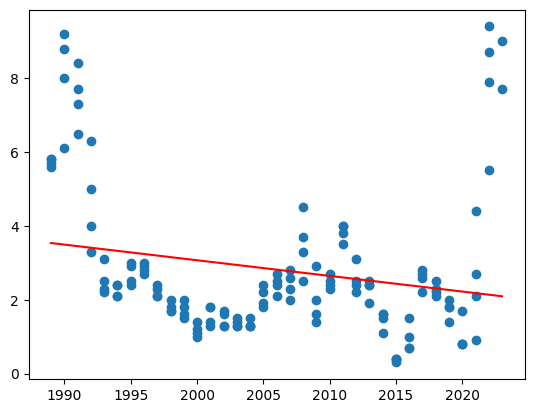

In [42]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

#as we see from the Yearly and Quarterly datasets there are extreme outliers in the 1990s and the 2020s. Because of this the linear regression tool is not useful. We could trim the outliers, however, this would not be a true representation of the graph as the outliers are what makes the graph interesting. This Question demonstrated how even with predictive statistics economic factors are extrmely difficult to forecast. In this case a logistic regression may have been more useful to study the causes of inflation by comparing the inflation data with known global issues from 1990 and 2020 such as the pessimistic views of consumers in the 90s due to credit card debit of the 80s and societies economic fear due to lockdowns, layoffs, and sickness from Covid 19 in 2020.